For our first task, we will work with a sample of data from an AWS s3 bucket.

The s3 URIs are:

- `s3://generable-test-bucket/data/subjects.csv`
- `s3://generable-test-bucket/data/biomarkers.csv`
- `s3://generable-test-bucket/data/events.csv`







---


# Load data

First we will load these csv files into your working session.

In [1]:
!pip install s3fs
import s3fs
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 3.7 MB/s 
     |████████████████████████████████| 9.1 MB 27.6 MB/s 
     |████████████████████████████████| 140 kB 43.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [2]:
subjects_df = pd.read_csv('s3://generable-test-bucket/data/subjects.csv')
bio_df = pd.read_csv('s3://generable-test-bucket/data/biomarkers.csv')
events_df = pd.read_csv('s3://generable-test-bucket/data/events.csv')



---

## Explore subjects data

This dataset is from a simulation study we used to evaluate the model. The simulation includes data from several clinical trials in Non-small-cell Lung Cancer (NSCLC) where each trial consists of subjects randomized to a treatment arms. 

The `subjects.csv` file contains the following columns:

 - `uuid`: string, random id for each subject (unique across all subject records in our database)
 - `individual_id`: the subject identifier provided by the sponsor
 - `trial`: string, trial name the subject is enrolled in
 - `trial_arm`: string, name of the trial arm the subject was randomized to
 - `sex`: string, biological sex of the subject
 - `smoking_exposure`: summary of smoking history of subject
 - `performance`: indicator reflecting how sick the subject is (can they get out of bed unassisted)
 - `source_type`: string, is the study actively enrolling? or is it a background (completed) study?
 - `last_evaluable_assessment`: if the data are censored, at what time are they censored (in study time, days)?
 - `regimen`: string, describing the treatment regimen for the arm
 - `first_treatment_day`: day of first treatment administration, in study time (days)
 - `params`: dictionary containing true values used for the simulation

Take a few minutes to familiarize yourself with the data in this table. 

Some questions to consider:
- How many subjects are in each trial? 
- How many arms does each trial have?
- Are covariates distributed equally across arms per trial?

In this section I am expecting you to pose and answer your own questions, or ask me for clarification where needed.

In [7]:
subjects_df.head()

,Unnamed: 0,uuid,individual_id,trial,trial_arm,sex,smoking_exposure,performance,source_type,last_evaluable_assessment,regimen,first_treatment_day,params
0,0,28770e14-315e-4c02-a7f3-1229ad768fef,0,study_1,trial_arm_0,female,never,0,background,NaN,treatment_1,0,"{'true_relative_hazard': 0.9150144222563474, '..."
1,1,74383ba6-3246-4b1a-8f79-eec9ad87aa58,1,study_2,trial_arm_1,female,former,0,background,NaN,treatment_1,0,"{'true_relative_hazard': 1.1047195548293576, '..."
2,2,86034319-5b03-45b5-97ea-22f5d66b72b3,10,study_1,trial_arm_0,female,never,0,background,NaN,treatment_1,0,"{'true_relative_hazard': 0.71684702656664, 'tr..."
3,3,55e2e672-12ad-4abd-a560-a8b629d73225,100,study_2,trial_arm_3,female,never,1,background,NaN,control_1,0,"{'true_relative_hazard': 0.7333511734492221, '..."
4,4,633add2d-1758-4602-b642-c10ba2cdf169,101,study_1,trial_arm_0,female,current,0,background,NaN,treatment_1,0,"{'true_relative_hazard': 0.7589214196167339, '..."


In [36]:
subjects_df[subjects_df['source_type'] == 'active'].head()

,Unnamed: 0,uuid,individual_id,trial,trial_arm,sex,smoking_exposure,performance,source_type,last_evaluable_assessment,regimen,first_treatment_day,params
900,900,1dc34be6-741d-44b0-8df6-0614adf83cc1,active-0,study_0,active-trial_arm_0,male,current,0,active,NaN,control_1,0,"{'true_relative_hazard': 0.7527211225185163, '..."
901,901,3135b93c-ef6c-4abd-87b0-17c7dde0f2cd,active-1,study_0,active-trial_arm_1,male,former,0,active,NaN,new_treatment,0,"{'true_relative_hazard': 0.8482817442653497, '..."
902,902,4030e373-7603-40fb-bb14-b90663159bf4,active-10,study_0,active-trial_arm_0,female,current,1,active,NaN,control_1,0,"{'true_relative_hazard': 0.7168597368769009, '..."
903,903,55a9d5bb-b9a5-4d9e-88cf-c6cfbac1d86f,active-100,study_0,active-trial_arm_0,male,current,0,active,NaN,control_1,0,"{'true_relative_hazard': 0.9034247628905335, '..."
904,904,9999292d-b633-4c01-a48f-855be763522f,active-1000,study_0,active-trial_arm_1,female,never,0,active,NaN,new_treatment,0,"{'true_relative_hazard': 0.7769190935348805, '..."


In [58]:
bio_df.head()

,Unnamed: 0,uuid,individual_id,trial,trial_day,measurement_value,measurement_name,measurement_unit,params
0,0,204c1701-9cb3-4bad-bbdb-a8224b380920,0,study_1,-16.0,146.644122,sld,mm,"{'true_sld_hat': 219.2352653557265, 'visit_num..."
1,1,cfdfe00a-531f-4155-8852-e67c5b44c44c,active-0,study_0,-4.0,86.164582,sld,mm,"{'true_sld_hat': 85.46881095497942, 'visit_num..."
2,2,ee2e720f-fbb4-4084-9993-efb2afc659cd,0,study_1,36.0,220.609748,sld,mm,"{'true_sld_hat': 242.22653071907288, 'visit_nu..."
3,3,c960fac0-4fb7-4924-891e-abc25daaebf0,active-0,study_0,47.0,79.919095,sld,mm,"{'true_sld_hat': 80.70426064528648, 'visit_num..."
4,4,f03654dd-57ee-4a9b-8bb1-6c7c5bcb92b2,0,study_1,91.0,254.320392,sld,mm,"{'true_sld_hat': 269.9462106732587, 'visit_num..."




---



---


Repeat this exploration for both the `biomarkers.csv` and `events.csv` data.

Some questions to consider:

- What event types are recorded in the events table?
- Which biomarkers are tracked over time?
- How many subjects are alive 3 months after starting treatment?

In [66]:
#bio_df.groupby('individual_id').apply(categorize_recist)
temp_df = bio_df[bio_df['individual_id'] == '0']
temp_df

,Unnamed: 0,uuid,individual_id,trial,trial_day,measurement_value,measurement_name,measurement_unit,params
0,0,204c1701-9cb3-4bad-bbdb-a8224b380920,0,study_1,-16.0,146.644122,sld,mm,"{'true_sld_hat': 219.2352653557265, 'visit_num..."
2,2,ee2e720f-fbb4-4084-9993-efb2afc659cd,0,study_1,36.0,220.609748,sld,mm,"{'true_sld_hat': 242.22653071907288, 'visit_nu..."
4,4,f03654dd-57ee-4a9b-8bb1-6c7c5bcb92b2,0,study_1,91.0,254.320392,sld,mm,"{'true_sld_hat': 269.9462106732587, 'visit_num..."
6,6,a331e1e2-aa5b-47fa-92e4-40080d507f3f,0,study_1,123.0,261.581419,sld,mm,"{'true_sld_hat': 287.8699926249308, 'visit_num..."
8,8,5afd478e-6d12-4372-beb8-5bb455c01f52,0,study_1,170.0,275.414662,sld,mm,"{'true_sld_hat': 316.85879137150243, 'visit_nu..."
10,10,e0a4fb56-1399-4dc6-b6a8-c65d1febfe0b,0,study_1,230.0,464.991058,sld,mm,"{'true_sld_hat': 359.0103498545324, 'visit_num..."
12,12,b26cd050-7380-4c53-8182-2e60aeb6bd3d,0,study_1,266.0,371.424471,sld,mm,"{'true_sld_hat': 387.402489191465, 'visit_num'..."
14,14,229fc59a-efd2-4cd0-9809-0ec25df3a0d3,0,study_1,318.0,324.695304,sld,mm,"{'true_sld_hat': 433.0302583290975, 'visit_num..."
16,16,bed0bc8e-b3d2-45c1-a328-4bda31335377,0,study_1,372.0,495.381341,sld,mm,"{'true_sld_hat': 486.87941395406085, 'visit_nu..."
18,18,ae334a2b-e308-4d47-994c-b2425490fc70,0,study_1,423.0,535.257034,sld,mm,"{'true_sld_hat': 544.5890500890658, 'visit_num..."


In [52]:
bio_df['individual_id'].value_counts()

0                       40
active-0                40
644                     40
active-0-phaseIII       40
active-644              40
                        ..
active-778-phaseII       1
active-766-phaseII       1
active-745-phaseII       1
active-1101-phaseIII     1
active-1910              1
Name: individual_id, Length: 3560, dtype: int64



---
# Tumor data

Our first exercise is to explore the tumor-size measurements over time.

An example of how these are often plotted is shown here: 
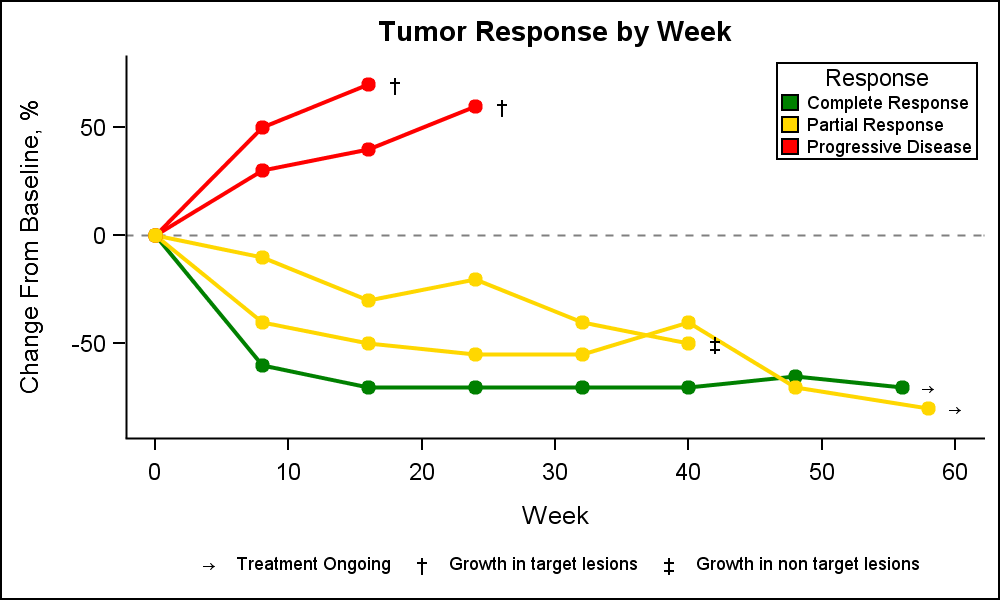

Let's try to recreate the main features of this plot for our data. How are our data different from that used in the example plot?


### Categorizing responses

There is a standard metric ([RECIST v1.1](https://ctep.cancer.gov/protocoldevelopment/docs/recist_guideline.pdf)) that is commonly used to evaluate results of Phase II trials.

It is a categorization of the tumor-size data at each measurement occasion for each subject, given the measurements observed to date.

A simplified version of this categorization is as follows:

1. **Complete Response (CR)**: Disappearance of all target lesions.
2. **Partial Response (PR)**: At least a 30% decrease in the sum of
diameters of target lesions, taking as reference the
baseline sum diameters.
3. **Progressive Disease (PD)**: At least a 20% increase in the sum
of diameters of target lesions, taking as reference
the smallest sum on study (this includes the baseline
sum if that is the smallest on study).
4. **Stable Disease (SD)**: Neither sufficient shrinkage to qualify for
PR nor sufficient increase to qualify for PD, taking as
reference the smallest sum diameters while on study.


**Todo:** Categorize the RECIST responses over time for each subject in the dataset

In [ ]:
def categorize_recist(measurement_value: pd.Series) -> pd.Series:
  # return recist responses as a pandas Series containing string values: PD, SD, PR, CR
  [5, 10, 12, 15, 20]
  



---

## Best Overall Response (BOR) and Overall Response Rate (ORR)

The Best Overall Response is then summarized for each patient, based on the time-series of their measurements:
> The best overall response is determined once all the data for the
patient is known.
**Best response determination in trials where confirmation of complete or partial response IS NOT required:** Best response in these
trials is defined as the best response across all time points (for
example, a patient who has SD at first assessment, PR at second assessment, and PD on last assessment has a best overall
response of PR). When SD is believed to be best response, it
must also meet the protocol specified minimum time from
baseline. If the minimum time is not met when SD is otherwise the best time point response, the patient’s best response
depends on the subsequent assessments. For example, a patient who has SD at first assessment, PD at second and does
not meet minimum duration for SD, will have a best response
of PD. The same patient lost to follow-up after the first SD
assessment would be considered inevaluable

Finally, the Overall Response Rate (ORR) is a summary of the percent of patients with either a partial or complete response (CR or PR).

**Todo:** Summarize the ORR per arm (regimen) and study

# Events data

Next we want to look at the events data for these studies.

These data are in survival-time format, so that data consist of pairs of observations per subject: (`time`, `status`).

A typical approach to analyzing these data is to summarize the [Kaplan-Meier](https://towardsdatascience.com/kaplan-meier-curve-explained-9c78a681faca) (non-parametric) estimator of survival probability at each follow-up time $t$. 

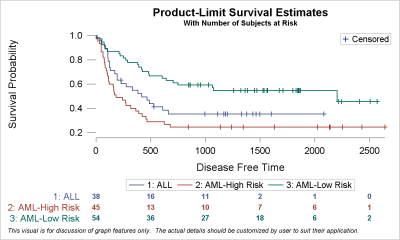


The Kaplan-Meier estimator for each follow-up time $t$ is defined as:

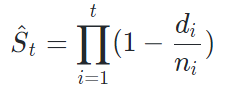


---
### Data checking

For these data, we expect the K-M estimates for the "true" and censored survival events to be roughly equivalent. How can we verify this?

What other expectations would you have about these data?

How would you check them?



---

## Restricted Mean Survival Time (RMST)

Following the analysis of survival-time data using the K-M estimator, we also compute the [RMST](https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/1471-2288-13-152). 

Here is a screenshot of the definition: 

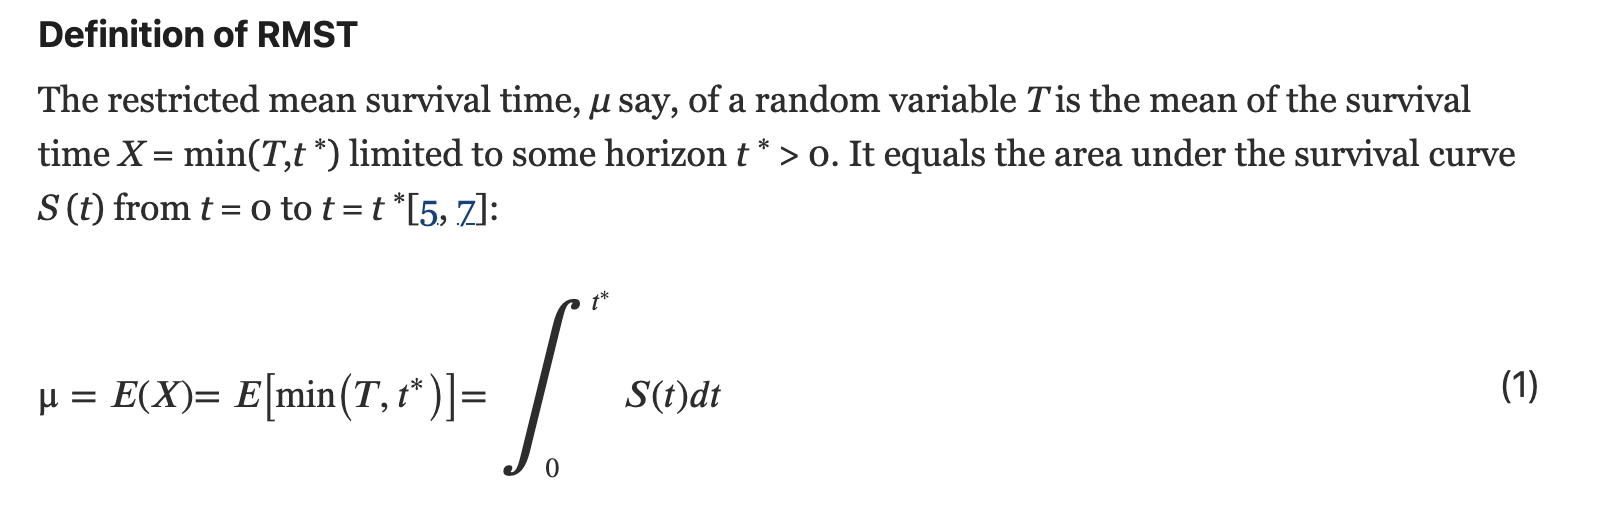

It has a nice property of being interpreted as the expected life-years (person-years) of survival for the population summarized, up to a time $t$.

How would you compute this from the K-M estimates?